In [1]:
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import plot_budg

import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [2]:
# Budget Output
globals_dict = ept.emu_plot(run_name="/efs_ecco/sjarugul/Project_Datasets/emu_budg_m_4_105.0_115.0_-12.0_-8.0_10.0_0.0") #Salt Budget Output from EMU
globals_dict1 = ept.emu_plot(run_name="/efs_ecco/sjarugul/Project_Datasets/emu_budg_m_2_105.0_115.0_-12.0_-8.0_10.0_0.0") #Heat Budget Output from EMU

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/sjarugul/Project_Datasets/emu_budg_m_4_105.0_115.0_-12.0_-8.0_10.0_0.0

Reading /efs_ecco/sjarugul/Project_Datasets/emu_budg_m_4_105.0_115.0_-12.0_-8.0_10.0_0.0

Reading Budget Tool output ... 
*********************************************
Read sum of salinity budget variables 
   budg_tend: tendency time-series (per second)
   budg_tend_name: name of variables in budg_tend
from file /efs_ecco/sjarugul/Project_Datasets/emu_budg_m_4_105.0_115.0_-12.0_-8.0_10.0_0.0/output/emu_budg.sum_tend

*********************************************
Read sum of salinity budget variables
   budg_tint: time-integrated tendency time-series
   budg_tint_name: name of variables in budg_tint
from file /efs_ecco/sjarugul/Project_Datasets/emu_budg_m_4_105.0_115.0_-12.0_-8.0_10.0_0.0/output/emu_budg.sum_tint

****************

In [3]:
#Get Variables
return_vars_dict = globals_dict.get('return_vars') #Salt Budget
return_vars_dict1 = globals_dict1.get('return_vars') #Heat Budget

In [4]:
#List variables in salt budget
print(return_vars_dict['budg_tend_name']) #vars in salt budget
print(return_vars_dict['emu_tend'].shape)

['dt', 'lhs', 'advh_slt', 'advh_vol', 'mixh', 'advv_slt', 'advv_vol', 'mixv', 'sfrc_slt', 'sfrc_vol']
(10, 312)


In [5]:
#List variables in heat budget
print(return_vars_dict1['budg_tend_name']) #vars in heat budget
print(return_vars_dict1['emu_tend'].shape)

['dt', 'lhs', 'advh', 'mixh', 'advv', 'mixv', 'tfrc']
(7, 312)


In [6]:
# Convert sbudget into an xarray with all budget terms with time dimension


time = pd.date_range(start='1992-01-01', end='2017-12-01', freq='MS')

slhs = return_vars_dict['lhs_tendency']
sadvh = return_vars_dict['emu_tend'][3]
smixh = return_vars_dict['emu_tend'][4]
sadvv = return_vars_dict['emu_tend'][6]
smixv = return_vars_dict['emu_tend'][7]
sfrc = return_vars_dict['frc_tendency']
sadv = return_vars_dict['adv_tendency']
smix = return_vars_dict['mix_tendency']

sbudget = xr.Dataset(
    {
        'lhs': (['time'], slhs),
        'advh': (['time'], sadvh),
        'mixh': (['time'], smixh),
        'advv': (['time'], sadvv),
        'mixv': (['time'], smixv),
        'frc': (['time'], sfrc),
        'adv': (['time'], sadv),
        'mix': (['time'], smix),        
    },
    coords={'time': time}
)

sbudget




<xarray.Dataset> Size: 22kB
Dimensions:  (time: 312)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1992-01-01 1992-02-01 ... 2017-12-01
Data variables:
    lhs      (time) float64 2kB 0.0 -1.153e-07 -1.092e-07 ... -1.083e-07 0.0
    advh     (time) float64 2kB 2.928e-06 -1.919e-06 ... 1.942e-06 -5.989e-07
    mixh     (time) float64 2kB 7.389e-10 -3.494e-09 ... 1.522e-09 2.614e-09
    advv     (time) float64 2kB -2.847e-06 2.133e-06 ... -1.754e-06 8.057e-07
    mixv     (time) float64 2kB 2.905e-07 5.683e-07 ... 2.319e-07 2.329e-07
    frc      (time) float64 2kB -7.976e-08 -2.146e-07 ... -1.879e-07 -2.068e-07
    adv      (time) float64 2kB -2.701e-07 -4.655e-07 ... -1.538e-07 -8.112e-08
    mix      (time) float64 2kB 2.912e-07 5.648e-07 ... 2.334e-07 2.355e-07

In [7]:
# Calculate the anomalies of budget terms

sbudget_anom = sbudget.groupby('time.month')-sbudget.groupby('time.month').mean('time')
sbudget_anom

<xarray.Dataset> Size: 25kB
Dimensions:  (time: 312)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1992-01-01 1992-02-01 ... 2017-12-01
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    lhs      (time) float64 2kB 2.955e-08 -7.12e-08 ... -6.575e-08 4.157e-08
    advh     (time) float64 2kB 4.661e-06 8.494e-07 ... 6.975e-07 -1.109e-08
    mixh     (time) float64 2kB -9.761e-10 -5.12e-09 ... 8.81e-10 1.06e-09
    advv     (time) float64 2kB -4.686e-06 -7.822e-07 ... -4.863e-07 1.671e-07
    mixv     (time) float64 2kB 4.514e-08 2.611e-07 ... 1.768e-07 6.554e-08
    frc      (time) float64 2kB 2.603e-08 -6.726e-08 ... -2.113e-07 -1.558e-07
    adv      (time) float64 2kB -9.7e-08 -2.599e-07 ... -3.211e-08 8.034e-08
    mix      (time) float64 2kB 4.416e-08 2.559e-07 ... 1.776e-07 6.66e-08

Text(0.5, 1.0, 'Anamolous Salt Budget Terms 2010')

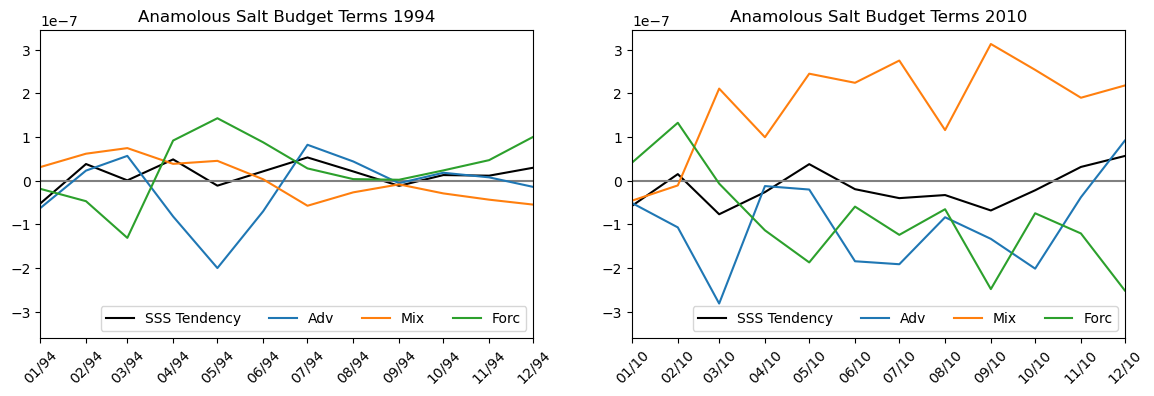

In [8]:
#Plot salt budget anomalies for 1994 and 2010

fig,ax = plt.subplots(1,2,figsize=(14,4))

ax1=ax[0]

ax1.plot(sbudget_anom.time,sbudget_anom.lhs,'-k',label='SSS Tendency')
ax1.plot(sbudget_anom.time,sbudget_anom.lhs*0,color='gray')

ax1.plot(sbudget_anom.time,sbudget_anom.adv,label='Adv')
ax1.plot(sbudget_anom.time,sbudget_anom.mix,label='Mix')
ax1.plot(sbudget_anom.time,sbudget_anom.frc,label='Forc')

#ax1.plot(time,sadvv,label='VAdv')
#ax1.plot(time,smixh+smixv,label='HMix')
#ax1.plot(time,smixv,label='VMix')
#ax1.plot(time,sfrc,label='Forc')

ax1.legend(loc="lower right",ncol=4)

ax1.set_xlim([pd.to_datetime('1994-01-01'), pd.to_datetime('1994-12-01')])
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%y'))
ax1.tick_params(axis='x', rotation=45) 
ax1.set_title('Anamolous Salt Budget Terms 1994')


ax1=ax[1]

ax1.plot(sbudget_anom.time,sbudget_anom.lhs,'-k',label='SSS Tendency')
ax1.plot(sbudget_anom.time,sbudget_anom.lhs*0,color='gray')

ax1.plot(sbudget_anom.time,sbudget_anom.adv,label='Adv')
ax1.plot(sbudget_anom.time,sbudget_anom.mix,label='Mix')
ax1.plot(sbudget_anom.time,sbudget_anom.frc,label='Forc')

#ax1.plot(time,sadvv,label='VAdv')
#ax1.plot(time,smixh+smixv,label='HMix')
#ax1.plot(time,smixv,label='VMix')
#ax1.plot(time,sfrc,label='Forc')

ax1.legend(loc="lower right",ncol=4)

ax1.set_xlim([pd.to_datetime('2010-01-01'), pd.to_datetime('2010-12-01')])
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%y'))
ax1.tick_params(axis='x', rotation=45) 
ax1.set_title('Anamolous Salt Budget Terms 2010')


#plt.savefig('/efs_ecco/sjarugul/Figures/EMU_Saltbudget_Java_1994_2010.png', bbox_inches='tight',dpi=300)


In [9]:
# Convert heat budget vars into xarray and compute the anomalies

time = pd.date_range(start='1992-01-01', end='2017-12-01', freq='MS')

tlhs = return_vars_dict1['lhs_tendency']
tadvh = return_vars_dict1['emu_tend'][2]
tmixh = return_vars_dict1['emu_tend'][3]
tadvv = return_vars_dict1['emu_tend'][4]
tmixv = return_vars_dict1['emu_tend'][5]
tfrc = return_vars_dict1['frc_tendency']
tadv = return_vars_dict1['adv_tendency']
tmix = return_vars_dict1['mix_tendency']

tbudget = xr.Dataset(
    {
        'lhs': (['time'], tlhs),
        'advh': (['time'], tadvh),
        'mixh': (['time'], tmixh),
        'advv': (['time'], tadvv),
        'mixv': (['time'], tmixv),
        'frc': (['time'], tfrc),
        'adv': (['time'], tadv),
        'mix': (['time'], tmix),        
    },
    coords={'time': time}
)

tbudget

tbudget_anom = tbudget.groupby('time.month')-tbudget.groupby('time.month').mean('time')
tbudget_anom

<xarray.Dataset> Size: 25kB
Dimensions:  (time: 312)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1992-01-01 1992-02-01 ... 2017-12-01
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    lhs      (time) float64 2kB -1.885e-08 -2.629e-07 ... -1.488e-07 -6.008e-08
    advh     (time) float64 2kB -4.254e-06 8.635e-07 ... -1.189e-07 2.958e-06
    mixh     (time) float64 2kB -5.316e-09 -6.024e-09 ... 4.802e-09 8.448e-09
    advv     (time) float64 2kB 4.326e-06 -8.991e-07 ... -1.109e-07 -3.189e-06
    mixv     (time) float64 2kB -1.604e-07 1.38e-07 ... 3.124e-08 -1.009e-07
    frc      (time) float64 2kB 3.068e-07 -3.593e-07 ... 4.508e-08 4.446e-07
    adv      (time) float64 2kB 7.268e-08 -3.561e-08 ... -2.299e-07 -2.309e-07
    mix      (time) float64 2kB -1.657e-07 1.32e-07 ... 3.604e-08 -9.249e-08

Text(0.5, 1.0, 'Anamolous Heat Budget Terms 2010')

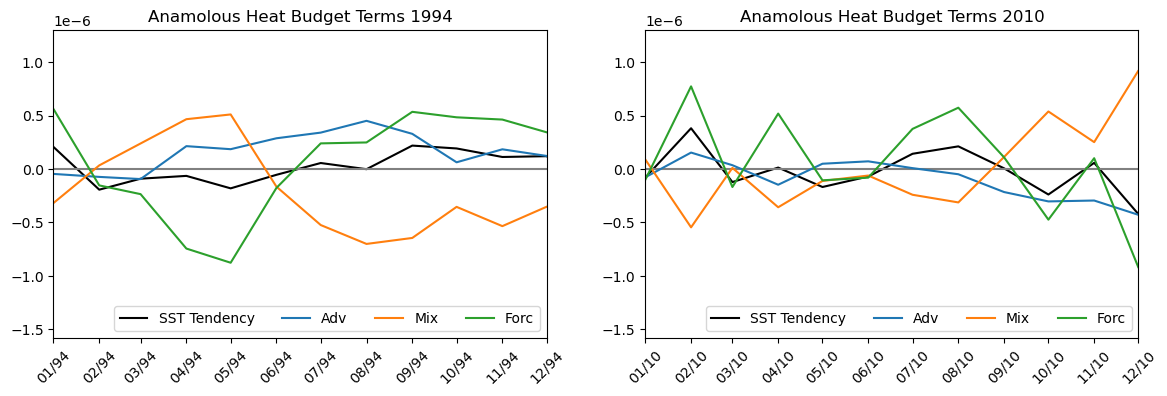

In [11]:
#Plot heat budget anomalies for 1994 and 2010


fig,ax = plt.subplots(1,2,figsize=(14,4))

ax1=ax[0]

ax1.plot(tbudget_anom.time,tbudget_anom.lhs,'-k',label='SST Tendency')
ax1.plot(tbudget_anom.time,tbudget_anom.lhs*0,color='gray')

ax1.plot(tbudget_anom.time,tbudget_anom.adv,label='Adv')
ax1.plot(tbudget_anom.time,tbudget_anom.mix,label='Mix')
ax1.plot(tbudget_anom.time,tbudget_anom.frc,label='Forc')

#ax1.plot(time,sadvv,label='VAdv')
#ax1.plot(time,smixh+smixv,label='HMix')
#ax1.plot(time,smixv,label='VMix')
#ax1.plot(time,sfrc,label='Forc')

ax1.legend(loc="lower right",ncol=4)

ax1.set_xlim([pd.to_datetime('1994-01-01'), pd.to_datetime('1994-12-01')])
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%y'))
ax1.tick_params(axis='x', rotation=45) 
ax1.set_title('Anamolous Heat Budget Terms 1994')


ax1=ax[1]

ax1.plot(tbudget_anom.time,tbudget_anom.lhs,'-k',label='SST Tendency')
ax1.plot(tbudget_anom.time,tbudget_anom.lhs*0,color='gray')

ax1.plot(tbudget_anom.time,tbudget_anom.adv,label='Adv')
ax1.plot(tbudget_anom.time,tbudget_anom.mix,label='Mix')
ax1.plot(tbudget_anom.time,tbudget_anom.frc,label='Forc')

#ax1.plot(time,sadvv,label='VAdv')
#ax1.plot(time,smixh+smixv,label='HMix')
#ax1.plot(time,smixv,label='VMix')
#ax1.plot(time,sfrc,label='Forc')

ax1.legend(loc="lower right",ncol=4)

ax1.set_xlim([pd.to_datetime('2010-01-01'), pd.to_datetime('2010-12-01')])
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%y'))
ax1.tick_params(axis='x', rotation=45) 
ax1.set_title('Anamolous Heat Budget Terms 2010')

#plt.savefig('/efs_ecco/sjarugul/Figures/EMU_Heatbudget_Java_1994_2010.png', bbox_inches='tight',dpi=300)
